After importing, the next step in many data science projects is exploratory data analysis (EDA), where you get a feel for your data by summarizing its main characteristics using descriptive statistics and data visualization. A good way to plan your EDA is by looking each column and asking yourself questions what it says about your dataset.

Después de la importación, el siguiente paso en muchos proyectos de ciencia de datos es el análisis exploratorio de datos (EDA), en el que se obtienen una idea de los datos resumiendo sus características principales mediante estadísticas descriptivas y visualización de datos. Una buena manera de planificar su EDA es mirar cada columna y preguntarse qué dice sobre su conjunto de datos.

1.2. Preparing Colombian Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

1. Import
The first part of any data science project is preparing your data, which means making sure its in the right place and format for you to conduct your analysis. The first step of any data preparation is importing your raw data and cleaning it.



If you look in the small-data directory on your machine, you'll see that the data for this project comes in  CSV file:Internet_Fijo_Penetraci_n_Municipio.csv 

**Task 1.2.1:** Read these three files into three separate DataFrames named `df1`.

In [4]:
df1 =  pd.read_csv("Internet_Fijo_Penetraci_n_Municipio.csv")


Now that you have your three DataFrames, it's time to inspect them to see if they need any cleaning. Let's look at them one-by-one.

 Inspect df1 by looking at its shape attribute. Then use the info method to see the data types and number of missing values for each column. Finally, use the head method to determine to look at the first five rows of your dataset.

In [5]:
df1.head()

,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2021,1,5,ANTIOQUIA,5361,ITUANGO,1086,28142,"0,0386"
1,2022,2,27,CHOCO,27077,BAJO BAUDO,267,32640,"0,0082"
2,2021,3,68,SANTANDER,68077,BARBOSA,4058,32328,"0,1255"
3,2022,1,15,BOYACA,15759,SOGAMOSO,31469,134977,"0,2331"
4,2021,2,50,META,50568,PUERTO GAITAN,1434,44239,"0,0324"


In [223]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13375 entries, 0 to 13374
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   AÑO                           13375 non-null  int64 
 1   TRIMESTRE                     13375 non-null  int64 
 2   COD_DEPARTAMENTO              13375 non-null  int64 
 3   DEPARTAMENTO                  13375 non-null  object
 4   COD_MUNICIPIO                 13375 non-null  int64 
 5   MUNICIPIO                     13375 non-null  object
 6   No. ACCESOS FIJOS A INTERNET  13375 non-null  int64 
 7   POBLACIÓN DANE                13375 non-null  int64 
 8   INDICE                        13375 non-null  object
dtypes: int64(6), object(3)
memory usage: 940.6+ KB


In [224]:
df1

,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2021,1,5,ANTIOQUIA,5361,ITUANGO,1086,28142,"0,0386"
1,2022,2,27,CHOCO,27077,BAJO BAUDO,267,32640,"0,0082"
2,2021,3,68,SANTANDER,68077,BARBOSA,4058,32328,"0,1255"
3,2022,1,15,BOYACA,15759,SOGAMOSO,31469,134977,"0,2331"
4,2021,2,50,META,50568,PUERTO GAITAN,1434,44239,"0,0324"
...,...,...,...,...,...,...,...,...,...
13370,2022,2,68,SANTANDER,68533,PARAMO,189,4851,"0,039"
13371,2022,3,17,CALDAS,17050,ARANZAZU,279,10735,"0,026"
13372,2021,4,5,ANTIOQUIA,5541,PE�OL,7582,22008,"0,3445"
13373,2021,3,44,LA GUAJIRA,44560,MANAURE,466,93190,"0,005"


Location Data: "lat" and "lon" in Colombian

They say that the most important tby using the "lat" and "lon" columns. Since latitude and longitude are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map. A great tool for this is the scatter_mapbox from the plotly library.

In [7]:
fig = px.scatter_mapbox(
    df1,  # Nuestro DataFrame
    lat="No. ACCESOS FIJOS A INTERNET",   # Columna que contiene las latitudes
    lon="POBLACIÓN DANE",  # Columna que contiene las longitudes
    hover_name="DEPARTAMENTO",  # Columna para los nombres al pasar el mouse
    center={"lat": 4.57, "lon": -74.29},  # Centro del mapa
    width=600,  # Ancho del mapa
    height=600,  # Altura del mapa
    hover_data=["INDICE"],  # Datos para mostrar al pasar el mouse
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()


In [226]:
df1["MUNICIPIO"].value_counts().head(10)

MUNICIPIO
BUENAVISTA       48
VILLANUEVA       48
LA UNION         48
SAN PEDRO        36
GRANADA          36
ALBANIA          36
CORDOBA          36
BOLIVAR          36
EL PE�ON         36
SANTA BARBARA    36
Name: count, dtype: int64

In [6]:
df1[["MUNICIPIO", "DEPARTAMENTO"]].describe()

,MUNICIPIO,DEPARTAMENTO
count,13375,13375
unique,1031,33
top,BUENAVISTA,ANTIOQUIA
freq,48,1500


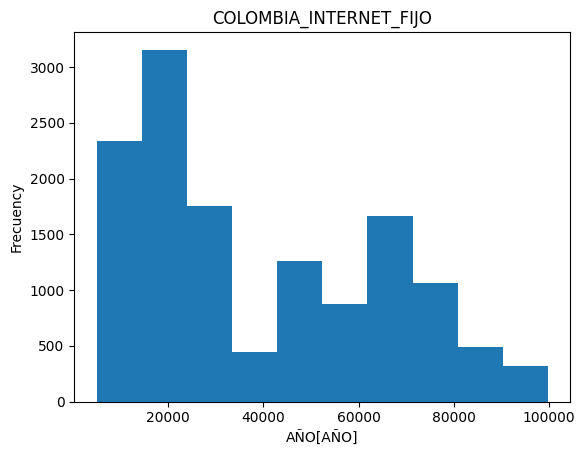

In [7]:
plt.hist(df1['COD_MUNICIPIO'])
plt.xlabel("AÑO[AÑO]");
plt.ylabel("Frecuency");
plt.title("COLOMBIA_INTERNET_FIJO");

As you can see, Bogota has high fixed internet connectivity.

In [8]:
df1


,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2021,1,5,ANTIOQUIA,5361,ITUANGO,1086,28142,"0,0386"
1,2022,2,27,CHOCO,27077,BAJO BAUDO,267,32640,"0,0082"
2,2021,3,68,SANTANDER,68077,BARBOSA,4058,32328,"0,1255"
3,2022,1,15,BOYACA,15759,SOGAMOSO,31469,134977,"0,2331"
4,2021,2,50,META,50568,PUERTO GAITAN,1434,44239,"0,0324"
...,...,...,...,...,...,...,...,...,...
13370,2022,2,68,SANTANDER,68533,PARAMO,189,4851,"0,039"
13371,2022,3,17,CALDAS,17050,ARANZAZU,279,10735,"0,026"
13372,2021,4,5,ANTIOQUIA,5541,PE�OL,7582,22008,"0,3445"
13373,2021,3,44,LA GUAJIRA,44560,MANAURE,466,93190,"0,005"


 Create a horizontal boxplot of "AÑO". Make sure that the x-axis has the label "Area [Internet]" and the plot has the title "COLOMBIA_INTERNET_FIJO". How is the distribution and its left skew represented differently here than in Histogram

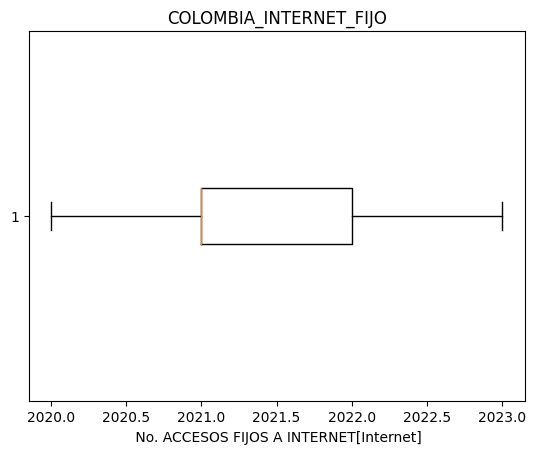

In [8]:
plt.boxplot(df1["AÑO"], vert=False);
plt.xlabel(" No. ACCESOS FIJOS A INTERNET[Internet]")
plt.title("COLOMBIA_INTERNET_FIJO");

 We Create a histogram of "COLOMBIA_INTERNET_FIJO". Make sure that the x-axis has the label "INDICE[POBLACION]", and the plot has the title "COLOMBIA_INTERNET_FIJO".

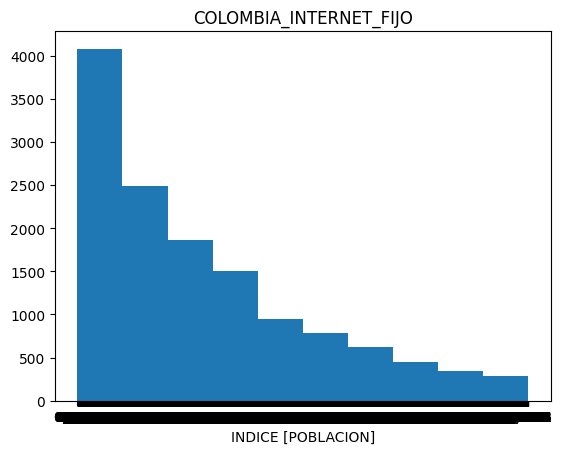

In [231]:
plt.hist(df1["INDICE"])
plt.xlabel("INDICE [POBLACION]")
plt.title("COLOMBIA_INTERNET_FIJO");

In [146]:
p_correlation = df1["AÑO"].corr(df1["No. ACCESOS FIJOS A INTERNET"])
print(p_correlation)

0.005442604343687755



A correlation coefficient of 0.0054 is a very weak correlation. This means that there is very little relationship between the two variables.



En este caso , el coeficiente de correlación de 0.0054 es muy cercano a 0, lo que indica una correlación muy débil entre las dos variables. Esto significa que hay muy poca relación entre las dos variables.

With a correlation coefficient that high, we can say that there's a strong relationship between house size and price in Morelos.

To conclude, let's look at the capital Mexico City (Distrito Federal).

In [15]:
df_ANTIOQUIA = df1[df1["DEPARTAMENTO"] == "ANTIOQUIA"]

In [16]:
df_ANTIOQUIA.head()

,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2021,1,5,ANTIOQUIA,5361,ITUANGO,1086,28142,"0,0386"
5,2020,3,5,ANTIOQUIA,5756,SONSON,4430,37301,"0,1188"
12,2021,3,5,ANTIOQUIA,5665,SAN PEDRO DE URABA,4152,32322,"0,1285"
19,2022,1,5,ANTIOQUIA,5579,PUERTO BERRIO,12121,41480,"0,2922"
22,2021,4,5,ANTIOQUIA,5004,ABRIAQUI,155,2777,"0,0558"


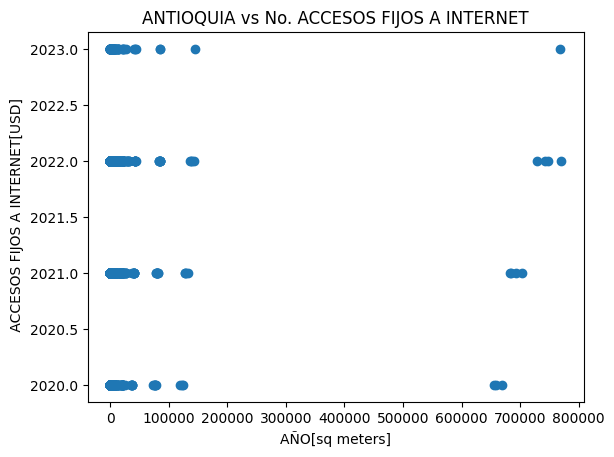

In [17]:
plt.scatter(x=df_ANTIOQUIA["No. ACCESOS FIJOS A INTERNET"], y=df_ANTIOQUIA["AÑO"])
plt.xlabel("AÑO[sq meters]")
plt.ylabel(" ACCESOS FIJOS A INTERNET[USD]")
plt.title("ANTIOQUIA vs No. ACCESOS FIJOS A INTERNET");

In [18]:
p_correlation = df_ANTIOQUIA["No. ACCESOS FIJOS A INTERNET"].corr(df_ANTIOQUIA["AÑO"])
print(p_correlation)

0.01280055416762046


Since the correlation value is close to zero, it indicates a very weak relationship between the number of fixed Internet accesses and the year in the Antioquia region (Colombia), at least in the data you have considered. This could mean that, in the range of years and the data collected, there is no significant relationship between the number of fixed Internet accesses and the year in that region.

Dado que el valor de correlación es cercano a cero, indica una relación muy débil entre el número de accesos fijos a Internet y el año en la región de Antioquia (Colombia), al menos en los datos que has considerado. Esto podría significar que, en el rango de años y los datos recopilados, no hay una relación significativa entre el número de accesos fijos a Internet y el año en esa región.

In [19]:

df_BOGOTA = df1[df1["DEPARTAMENTO"] == "BOGOTA"]



In [20]:
df_BOGOTA.head()

,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
2854,2020,2,11,BOGOTA,11001,"BOGOTA, D.C.",2025140,7732161,"0,2619"
3595,2021,1,11,BOGOTA,11001,"BOGOTA, D.C.",2139304,7823334,"0,2735"
3643,2022,4,11,BOGOTA,11001,"BOGOTA, D.C.",2269613,7873316,"0,2883"
5297,2020,4,11,BOGOTA,11001,"BOGOTA, D.C.",2088680,7732161,"0,2701"
5588,2022,1,11,BOGOTA,11001,"BOGOTA, D.C.",2240466,7873316,"0,2846"


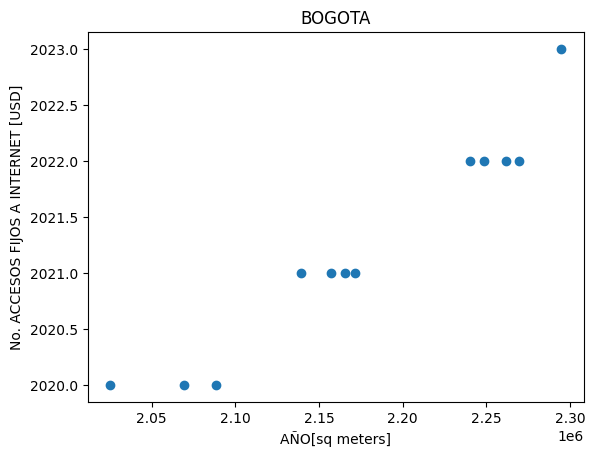

In [21]:
# Subset `df` to include only observations from `"Distrito Federal"`
df1 = df1[df1["DEPARTAMENTO"] =="MUNICIPIO"]

# Create a scatter plot price vs area
plt.scatter(x=df_BOGOTA["No. ACCESOS FIJOS A INTERNET"], y=df_BOGOTA["AÑO"])
plt.xlabel("AÑO[sq meters]")
plt.ylabel("No. ACCESOS FIJOS A INTERNET [USD]")
plt.title("BOGOTA");


In [210]:
p_correlation = df_BOGOTA["No. ACCESOS FIJOS A INTERNET"].corr(df_BOGOTA["AÑO"])
print(p_correlation)

0.9678155473042589


A correlation coefficient of 0.9678 indicates a very strong positive correlation between the two variables. This means that the two variables are very closely related and that there is a strong likelihood that there is a causal relationship between them.
A correlation coefficient of 1 would indicate a perfect positive correlation, meaning that the two variables would always move in the same direction and by the same amount. A correlation coefficient of -1 would indicate a perfect negative correlation, meaning that the two variables would always move in opposite directions and by the same amount.

El resultado de la correlación es 0.95, lo que indica una correlación muy fuerte entre las dos variables. Esto significa que las dos variables están muy relacionadas entre sí.
Una correlación de 0.95 significa que hay una relación lineal muy estrecha entre las dos variables. Esto significa que, cuando una variable aumenta, la otra variable también aumenta en una proporción similar.